<h1>Raster Fairy - Arrangements</h1>
<p>Version 1.0<br/>Author: Mario Klingemann | @Quasimondo</p>
<p>This demo shows the various arrangements Raster Fairy finds for a given number of data points</p>

Found the these arrangements for 493 elements


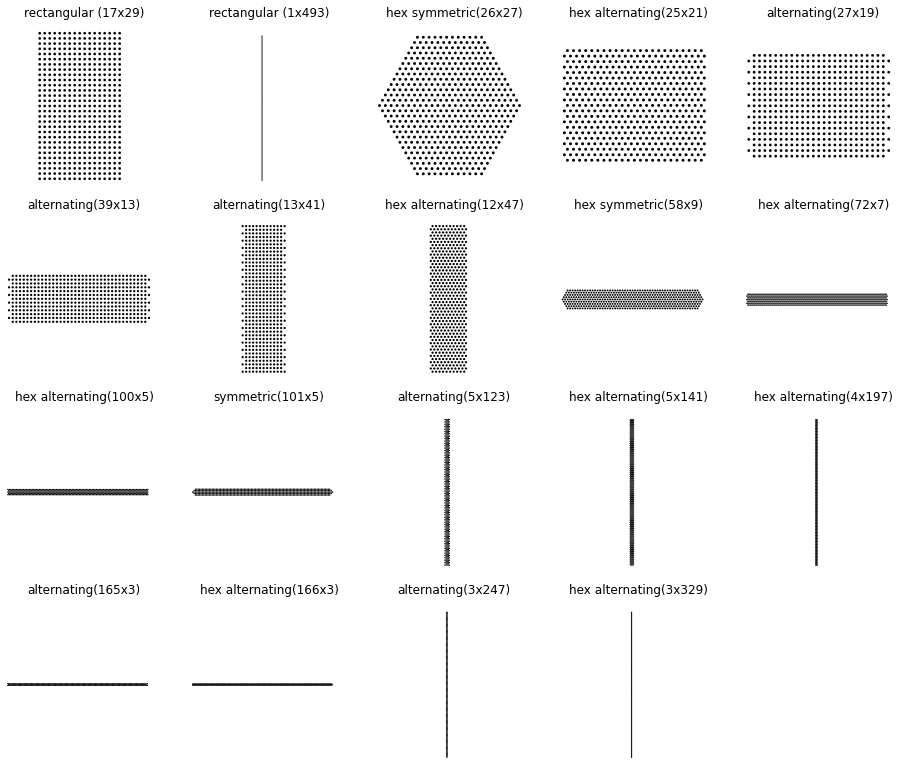

In [18]:
# just some basic setup for the purpose of this demo:
%matplotlib inline  
from IPython.display import display
import matplotlib.pyplot as plt
import pylab
import math

import numpy as np
import rasterfairy

#number of elements to find arrangements for:
totalDataPoints = 493

#in thise case the original point set doesn't matter, zeros will do
xy = np.zeros((totalDataPoints,2))

#rectangular grid:
rectArrangements = rasterfairy.getRectArrangements(totalDataPoints) 

#other arrangements:
arrangements = rasterfairy.getArrangements(totalDataPoints) 
#...which have to be converted to a raster mask
arrangementMasks = rasterfairy.arrangementListToRasterMasks(arrangements) 

print "Found these arrangements for",totalDataPoints,"elements"

# eating my own dog food I'm also using raster fairy to get a good table for showing t
# the available arrangements
totalArrangements = len(arrangementMasks) +  len(rectArrangements)
demoGrid = rasterfairy.getRectArrangements( totalArrangements )[0]

# if the number of arrangements does not split evenly
# and the proportion would be ugly we fall back to an
# incomplete square:
if float(demoGrid[0]) / float(demoGrid[1]) < 0.4:
    rows = int(math.sqrt(totalArrangements))
    cols = int(math.ceil(totalArrangements/float(rows) ))
    demoGrid = (rows,cols)

pylab.rcParams['figure.figsize'] = (16.0, 16.5 * float(demoGrid[0]) / float(demoGrid[1]))

fig = plt.figure()
j = 1
for i in range(len(rectArrangements)):
    grid_xy =  rasterfairy.transformPointCloud2D(xy,target=rectArrangements[i])
    
    # fix for stretching behaviour of matplotlib
    grid_xy[:,0] -= np.min(grid_xy[:,0])
    grid_xy[:,1] -= np.min(grid_xy[:,1])
    w = np.max(grid_xy[:,0])
    h = np.max(grid_xy[:,1])
    dim = max(w,h)
    grid_xy[:,0] += 0.5 * (dim-w)+0.5
    grid_xy[:,1] += 0.5 * (dim-h)+0.5
    
    ax = fig.add_subplot(demoGrid[0], demoGrid[1], j)
    j+=1
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xlim([0,dim*1.1])
    ax.axes.set_ylim([0,dim*1.1])
    ax.scatter(grid_xy[:,0],grid_xy[:,1], c = 'black',  edgecolors='none',s=200.0 / dim)  
    ax.set_title( "rectangular ("+str(rectArrangements[i][0])+"x"+str(rectArrangements[i][1])+")")
        
for i in range(len(arrangementMasks)):
    grid_xy = rasterfairy.transformPointCloud2D(xy,target=arrangementMasks[i])
    
    # fix for stretching behaviour of matplotlib
    grid_xy[:,0] -= np.min(grid_xy[:,0])
    grid_xy[:,1] -= np.min(grid_xy[:,1])
    w = np.max(grid_xy[:,0])
    h = np.max(grid_xy[:,1])
    dim = max(w,h)
    grid_xy[:,0] += 0.5 * (dim-w)+0.5
    grid_xy[:,1] += 0.5 * (dim-h)+0.5
    
    ax = fig.add_subplot(demoGrid[0], demoGrid[1], j)
    j+=1
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xlim([0.0,1.1*dim])
    ax.axes.set_ylim([0.0,1.1*dim])
    
    ax.scatter(grid_xy[:,0],grid_xy[:,1], c = 'black',  edgecolors='none',s=200.0 / dim)  
    ishex = ""
    if arrangementMasks[i]['hex']:
        ishex = "hex "
    ax.set_title( ishex + arrangementMasks[i]['type'] + "("+str(arrangementMasks[i]['width'])+"x"+str(arrangementMasks[i]['height'])+")")

plt.show()
